In [1]:
from random import randint, uniform
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import cv2
from sklearn import metrics

# Data Creation

In [2]:
blank_df = pd.read_csv(r'C:\Users\dso1222\Documents\TextRecognition\Forms\KNN\BlankClaimFormatted.csv')

In [3]:
blank_df.head()

,name,xmin,ymin,xmax,ymax
0,0_QRCode,57,48,159,149
1,1a_InsuredID,1036,290,1638,335
2,2_PtName,56,336,626,402
3,3_PtDOB_MM,649,359,709,398
4,3_PtDOB_DD,709,358,768,402


In [4]:
trainData = []
trainLabel = []
for index, row in blank_df.iterrows():
    height = int(row['ymax'])-int(row['ymin'])
    width = int(row['xmax'])-int(row['xmin'])
    xcenter = int(row['xmin']) + (width/2)
    ycenter = int(row['ymin'])+(height/2)
    for count in range(3000):
        offset = randint(-(height), height)
        y = ycenter+offset
        if y < 0:
            y = 0
        else:
            pass
        trainData.append([round(xcenter),round(y)])
        trainLabel.append(row['name'])

In [5]:
trainData

[[108, 142],
 [108, 130],
 [108, 52],
 [108, 102],
 [108, 36],
 [108, 124],
 [108, 158],
 [108, 74],
 [108, 40],
 [108, 68],
 [108, 78],
 [108, 90],
 [108, 66],
 [108, 48],
 [108, 146],
 [108, 156],
 [108, 126],
 [108, 48],
 [108, 22],
 [108, 90],
 [108, 22],
 [108, 140],
 [108, 24],
 [108, 130],
 [108, 50],
 [108, 198],
 [108, 104],
 [108, 148],
 [108, 88],
 [108, 42],
 [108, 198],
 [108, 94],
 [108, 134],
 [108, 4],
 [108, 82],
 [108, 152],
 [108, 32],
 [108, 144],
 [108, 112],
 [108, 116],
 [108, 82],
 [108, 34],
 [108, 136],
 [108, 50],
 [108, 18],
 [108, 152],
 [108, 96],
 [108, 148],
 [108, 76],
 [108, 186],
 [108, 32],
 [108, 164],
 [108, 10],
 [108, 122],
 [108, 38],
 [108, 18],
 [108, 170],
 [108, 90],
 [108, 168],
 [108, 66],
 [108, 62],
 [108, 156],
 [108, 108],
 [108, 176],
 [108, 24],
 [108, 128],
 [108, 142],
 [108, 104],
 [108, 86],
 [108, 194],
 [108, 30],
 [108, 88],
 [108, 172],
 [108, 118],
 [108, 82],
 [108, 98],
 [108, 124],
 [108, 82],
 [108, 64],
 [108, 168],
 [1

# Change to Array; Test Train Split

In [6]:
data = np.array(trainData)
label = np.array(trainLabel)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(data,label,test_size=0.2, random_state=4)

In [8]:
y_train.shape

(537600,)

# KNN Uniform Weight

In [9]:
k_range=[1,3,5,7,9,11,13,15,17,19,21,23,25]
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))
    print(k)

1
3
5
7
9
11
13
15
17
19
21
23
25


Text(0, 0.5, 'Test Acc')

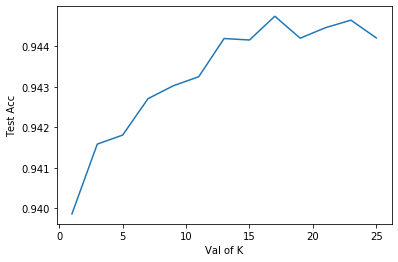

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range,scores_list)
plt.xlabel('Val of K')
plt.ylabel('Test Acc')

In [11]:
max(scores_list)

0.9447470238095238

In [12]:
k_range[scores_list.index(max(scores_list))]

17

# KNN Distance Weighted

In [13]:
k_range = [1,3,5,7,9,11,13,15,17,19,21,23,25]
scoresW = {}
scores_listW = []

for k in k_range:
    knnW = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knnW.fit(x_train, y_train)
    y_pred = knnW.predict(x_test)
    scoresW[k] = metrics.accuracy_score(y_test, y_pred)
    scores_listW.append(metrics.accuracy_score(y_test, y_pred))
    print(k)

1
3
5
7
9
11
13
15
17
19
21
23
25


Text(0, 0.5, 'Test Acc')

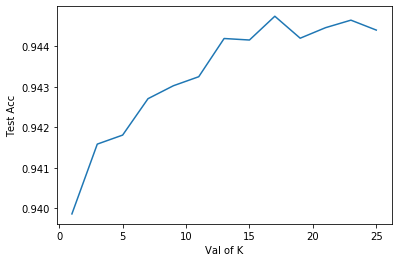

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range,scores_listW)
plt.xlabel('Val of K')
plt.ylabel('Test Acc')

In [15]:
max(scores_listW)

0.9447470238095238

In [16]:
k_range[scores_listW.index(max(scores_listW))]

17

# Drawing a Point

In [17]:
img = cv2.imread(r'C:\Users\dso1222\Documents\TextRecognition\Forms\BlankClaimCropped.ppm')
img2 = cv2.imread(r'C:\Users\dso1222\Documents\TextRecognition\Forms\BlankClaimCropped.ppm')

In [18]:
#Iterate through the first 6000 items in the training data which should correspond to the 
for item in range(6000):
    xmin = trainData[item][0]
    ymin = trainData[item][1]
    if item <3000:
        img[ymin:(ymin+5), xmin:(xmin+5)] = (0, 255, 0)
    else:
        img2[ymin:(ymin+5), xmin:(xmin+5)] = (0, 0, 0)

In [19]:
cv2.imwrite(r'C:\Users\dso1222\Documents\TextRecognition\Forms\offset1.jpg',img)
cv2.imwrite(r'C:\Users\dso1222\Documents\TextRecognition\Forms\offset2.jpg',img2)

True

In [20]:
cv2.namedWindow('test', cv2.WINDOW_NORMAL)
cv2.resizeWindow('test', 700, 1000)
cv2.imshow('test',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
trainData[3002]

[1337, 344]